## TASK 3

### CAR PRICE PREDICTION


### ABOUT THE DATASET:
 The dataset includes a number of automobile-related characteristics, such as the mileage, engine specs, seller type, year of manufacturing, cost of sale, number of kilometers driven, fuel type, and type of transmission. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
import warnings

# Suppress runtime warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [3]:
df= pd.read_csv("C:\\Users\\ASUS\\Downloads\\car data.csv")

## Exploratory Data Analysis

In [81]:
df.isnull()
df.dropna()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Univariate Analysis

In [82]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Target Variable -(Present Price)

#### Statistics of Target Variable

In [83]:
df['Present_Year']= 2024
df['Year_diff'] = df['Present_Year']- df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Present_Year,Year_diff
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [84]:
df.drop(['Present_Year'], axis= 1,inplace= True)

In [85]:
price_stats = df['Present_Price'].describe().reset_index()
price_stats.columns = ['Statistic', 'Value']
price_stats_df = pd.DataFrame(price_stats)
price_stats_df

,Statistic,Value
0,count,301.000000
1,mean,7.628472
2,std,8.642584
3,min,0.320000
4,25%,1.200000
5,50%,6.400000
6,75%,9.900000
7,max,92.600000


### Distribution of Target Variable

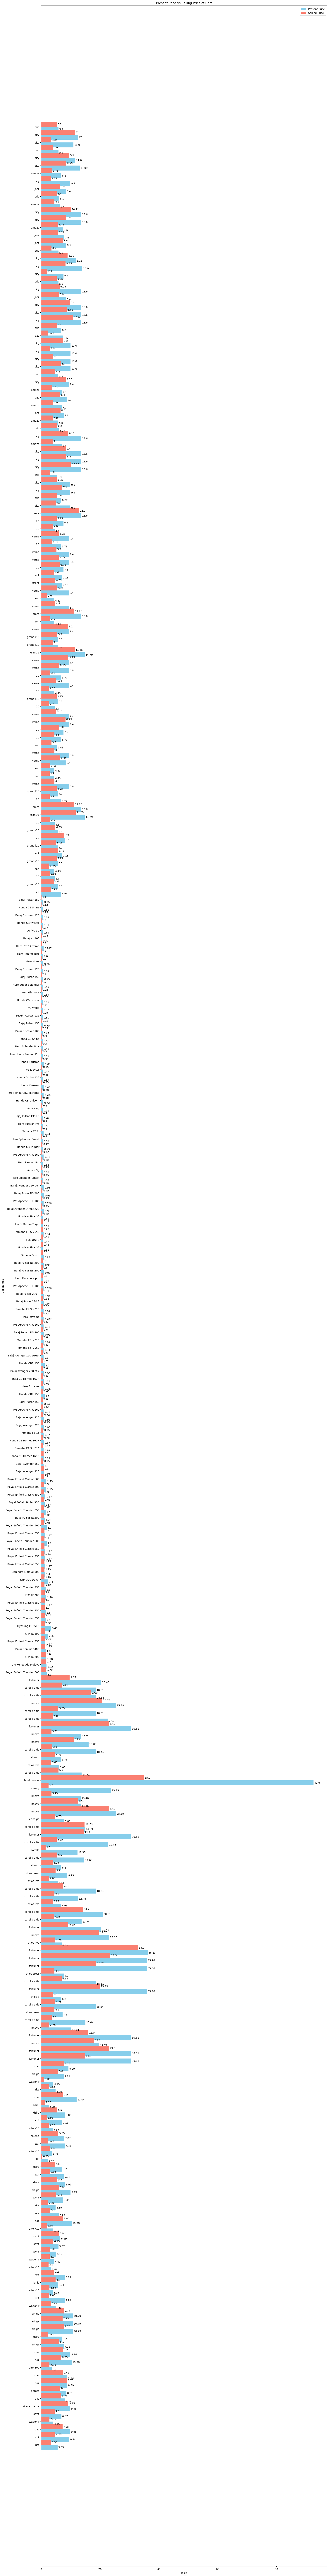

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame with columns: 'Car_Name', 'Present_Price', and 'Selling_Price'
# You can modify this according to your actual column names
car_names = df['Car_Name']
present_prices = df['Present_Price']
selling_prices = df['Selling_Price']

# Define the height of each bar
bar_height = 0.65  # Adjust this value for thicker bars

# Define the positions for the bars
y = np.arange(len(car_names))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(20, 180))


# Plot the present price bars
bars1 = ax.barh(y, present_prices, height=bar_height, color='skyblue', label='Present Price')

# Plot the selling price bars with adjusted y positions
bars2 = ax.barh(y + bar_height, selling_prices, height=bar_height, color='salmon', label='Selling Price')

# Set the labels and title
ax.set_title('Present Price vs Selling Price of Cars')
ax.set_xlabel('Price')
ax.set_ylabel('Car Names')
ax.set_yticks(y + bar_height / 2)
ax.set_yticklabels(car_names)
ax.legend()

# Add value labels
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

add_value_labels(bars1)
add_value_labels(bars2)

#plt.subplots_adjust(top=0.55, bottom=0.15)
plt.show()


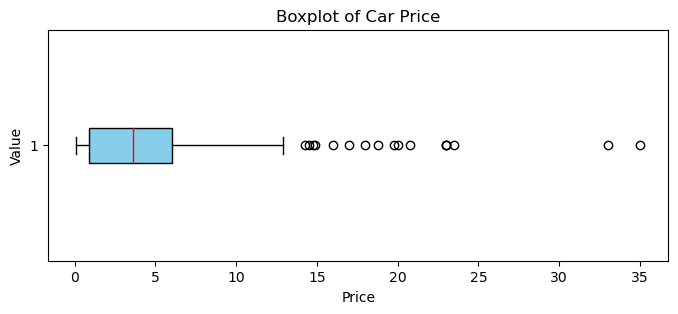

In [87]:
plt.figure(figsize=(8, 3))
plt.boxplot(df['Selling_Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'), medianprops=dict(color='red'))
plt.title('Boxplot of Car Price')
plt.xlabel('Price')
plt.ylabel('Value')
plt.show()

### Dealing with Outliers

In [88]:
# Assuming df is your DataFrame containing the data
selling_prices = df['Selling_Price']
selling_price_threshold = 12  # Define your threshold for selling price outliers

# Calculate the mean of non-outlier values
selling_price_mean = selling_prices[selling_prices < selling_price_threshold].mean()

# Replace outliers with the mean
df['Selling_Price'] = selling_prices.apply(lambda x: x if x < selling_price_threshold else selling_price_mean)

# Display the selling prices after mean imputation
print(df)


    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  Year_diff  
0         Dealer       Manual      0         10  
1         D

In [89]:
df.columns
df.drop(columns=['Car_Name'], inplace=True)


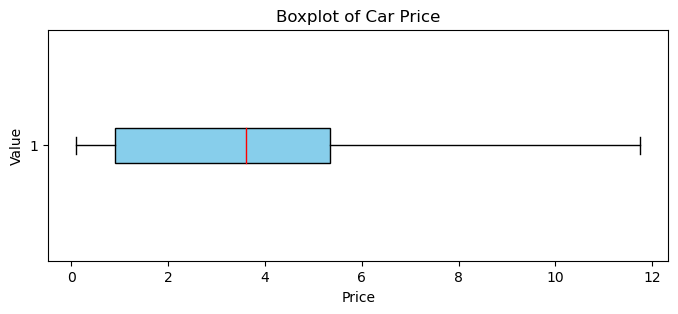

In [90]:
plt.figure(figsize=(8, 3))
plt.boxplot(df['Selling_Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'), medianprops=dict(color='red'))
plt.title('Boxplot of Car Price')
plt.xlabel('Price')
plt.ylabel('Value')
plt.show()

In [91]:
df = pd.get_dummies(df, drop_first = True)

In [92]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Year_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,10,False,True,False,True
1,2013,4.75,9.54,43000,0,11,True,False,False,True
2,2017,7.25,9.85,6900,0,7,False,True,False,True
3,2011,2.85,4.15,5200,0,13,False,True,False,True
4,2014,4.60,6.87,42450,0,10,True,False,False,True


In [93]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame containing the data with categorical features
# Let's say 'brand' and 'feature_type' are categorical columns that need to be encoded

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
label_encoder.fit_transform(df['Fuel_Type_Diesel'])
label_encoder.fit_transform(df['Fuel_Type_Petrol'])
label_encoder.fit_transform(df['Selling_type_Individual'])
label_encoder.fit_transform(df['Transmission_Manual'])

# Display the DataFrame with encoded columns
print(df)


     Year  Selling_Price  Present_Price  Driven_kms  Owner  Year_diff  \
0    2014           3.35           5.59       27000      0         10   
1    2013           4.75           9.54       43000      0         11   
2    2017           7.25           9.85        6900      0          7   
3    2011           2.85           4.15        5200      0         13   
4    2014           4.60           6.87       42450      0         10   
..    ...            ...            ...         ...    ...        ...   
296  2016           9.50          11.60       33988      0          8   
297  2015           4.00           5.90       60000      0          9   
298  2009           3.35          11.00       87934      0         15   
299  2017          11.50          12.50        9000      0          7   
300  2016           5.30           5.90        5464      0          8   

     Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
0               False              True                

In [94]:
df.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Year_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Year,1.000000,0.268583,-0.047192,-0.524342,-0.182104,-1.000000,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.268583,1.000000,0.456661,-0.003012,-0.094718,-0.268583,0.385245,-0.377424,-0.744526,-0.034792
Present_Price,-0.047192,0.456661,1.000000,0.203618,0.008058,0.047192,0.473390,-0.465326,-0.512121,-0.348776
Driven_kms,-0.524342,-0.003012,0.203618,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.094718,0.008058,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Year_diff,-1.000000,-0.268583,0.047192,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.064315,0.385245,0.473390,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.377424,-0.465326,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Selling_type_Individual,-0.039896,-0.744526,-0.512121,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.034792,-0.348776,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


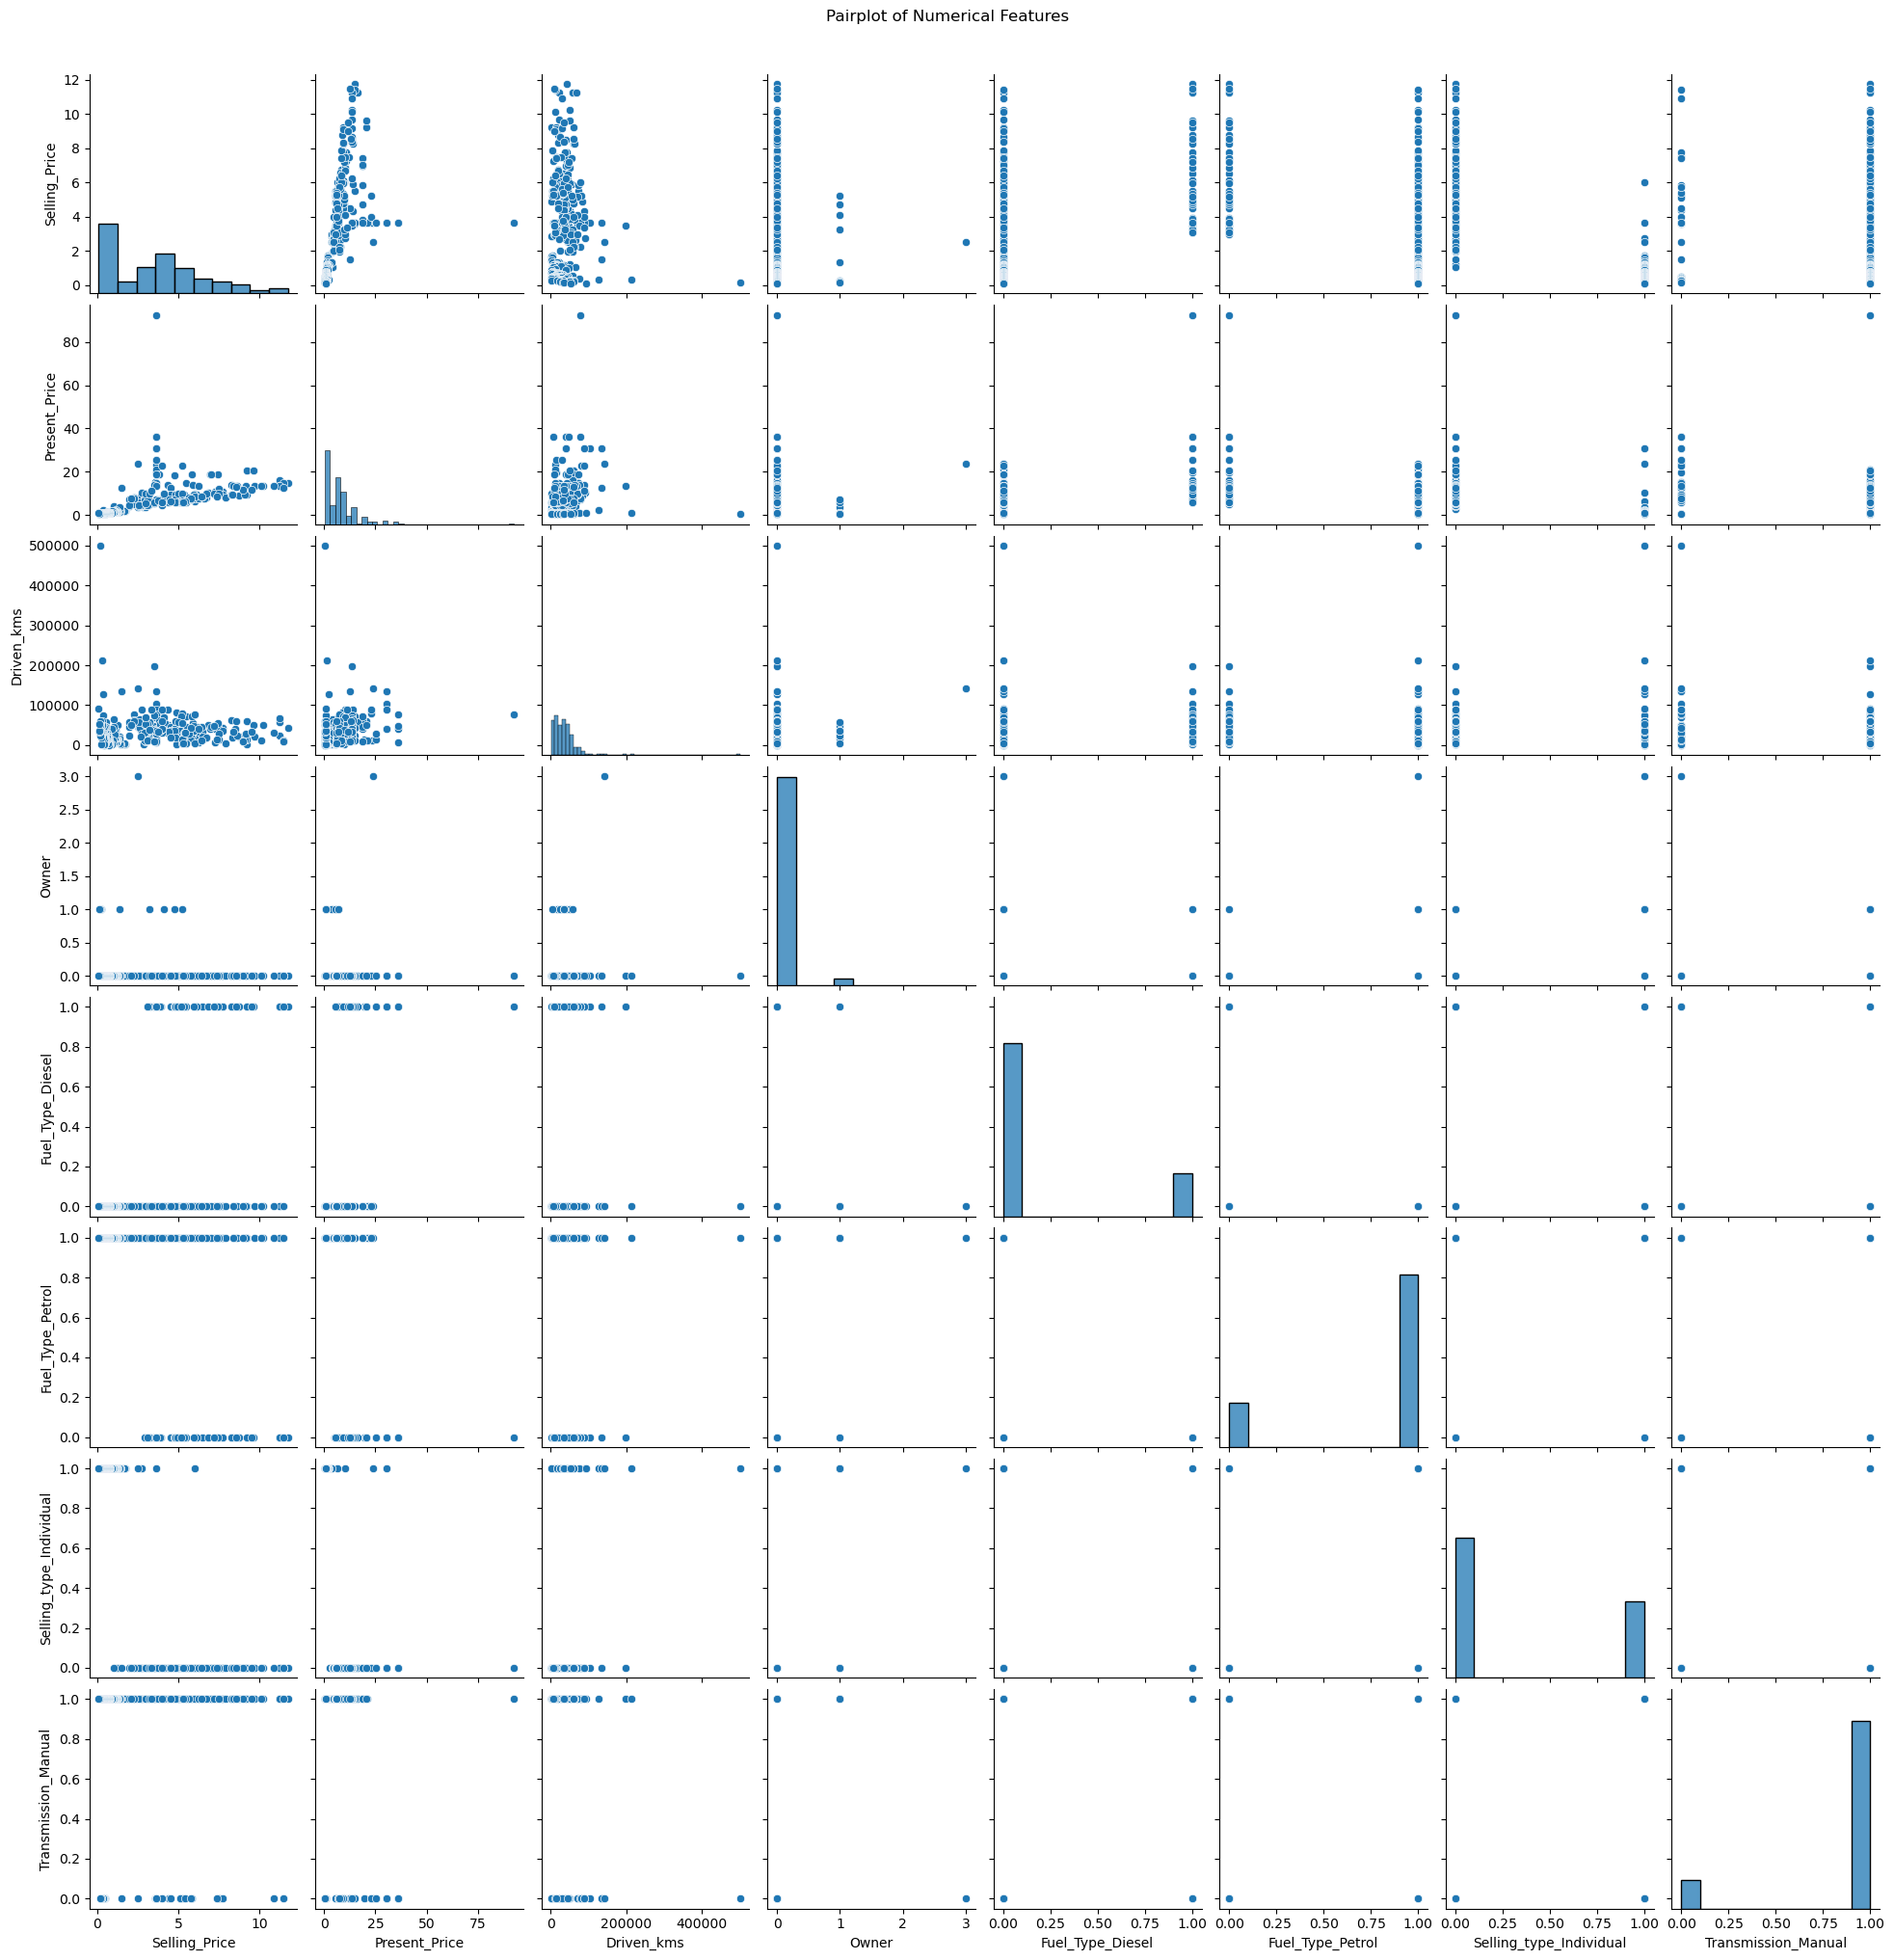

In [95]:
numerical_features= df.drop(columns=['Year','Year_diff'])
sns.pairplot(numerical_features)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

<Axes: >

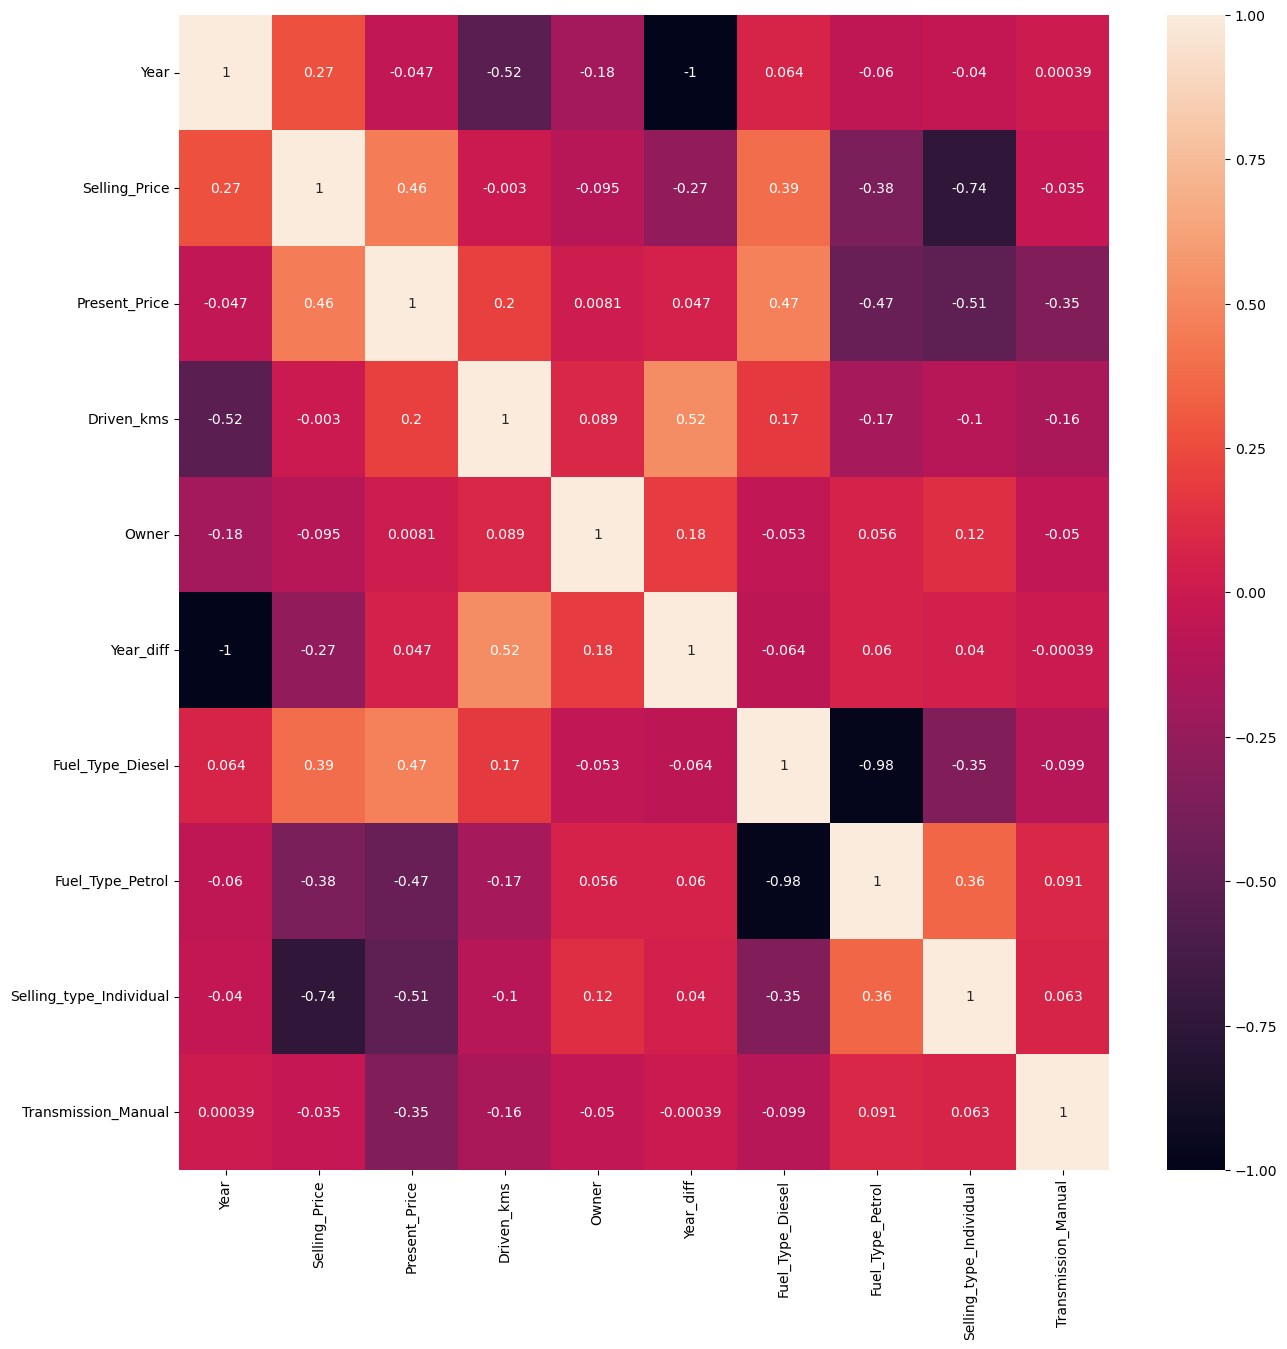

In [96]:
correlation_matrix= df.corr().index
plt.figure(figsize=(15,15))
sns.heatmap(df[correlation_matrix].corr(),annot=True)

### Splitting and Training of data

In [97]:
X= df.drop(columns=['Year','Selling_Price']).reset_index()
X.drop(['index'], axis= 1,inplace= True)
y=df['Selling_Price']

In [98]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [99]:
print(model.feature_importances_)

[0.24335905 0.04680806 0.0024549  0.11794131 0.01840046 0.00665407
 0.54400377 0.02037837]


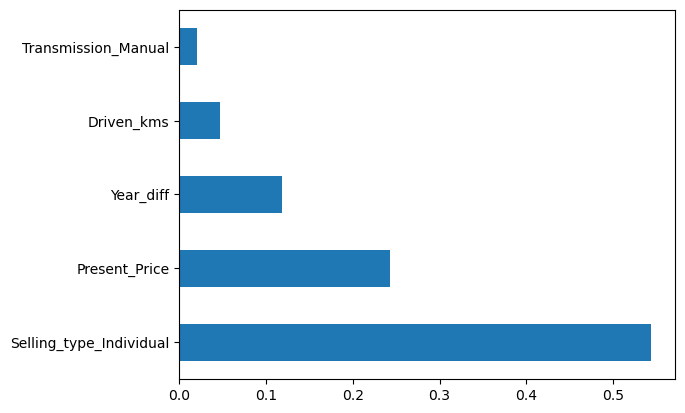

In [100]:
f_imp = pd.Series(model.feature_importances_, index=X.columns)
f_imp.nlargest(5).plot(kind='barh')
plt.show()

In [101]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

### Model Evaluation

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 2.55351295663786e-15
Mean Squared Error: 2.0938053644839614e-29
R-squared: 1.0


In [103]:
X_train.shape
print(X_train)

     Present_Price  Driven_kms  Owner  Year_diff  Fuel_Type_Diesel  \
121          1.500        6900      0         13             False   
199          0.580       53000      0         17             False   
224          9.400       36198      0         11             False   
120          1.260        5700      0          8             False   
283         11.800        9010      0          8             False   
..             ...         ...    ...        ...               ...   
24           4.410       56879      0         11             False   
194          0.787       50000      0         16             False   
231          9.400       15001      0          7             False   
140          1.200       32000      0         11             False   
294          6.800       33019      0         10             False   

     Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
121              True                     True                 True  
199              Tr

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [105]:
rf_random.fit(X_train,y_train)

RandomForestRegressor()

#### Hyperparameter tuning

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
parameters = {
    'n_estimators' : [100,200, 300, 3400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squarred_error', 'absolute_error', 'poisson', 'friedman_mse'],
    'max_depth': [10,20,30,40,50],
    'min_samples_split': [2,5,10,20, 50],
    'min_samples_leaf': [1,2,5,10],
    'max_features': ['auto', 'sqrt', 'log2']
}
parameters

{'n_estimators': [100, 200, 300, 3400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squarred_error', 'absolute_error', 'poisson', 'friedman_mse'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [108]:
random_cv= RandomizedSearchCV(estimator= rf_random, param_distributions=parameters, n_iter=10,
                             scoring = 'neg_mean_absolute_error', random_state= 42, cv=5, verbose=2, n_jobs= -1)

In [109]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squarred_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 3400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [110]:
random_cv.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'absolute_error'}

These are the best hyperparameters found during the randomized search

In [111]:
random_cv.best_score_

-0.7307426445879769

### Predictions

In [112]:
prediction= rf_random.predict(X_test)
prediction

array([1.3306    , 5.4845    , 2.2725    , 0.2437    , 3.6472695 ,
       1.1725    , 8.25853582, 4.42      , 6.226     , 1.1297    ,
       0.4666    , 4.092     , 0.7264    , 5.2635    , 1.1392    ,
       6.0415    , 6.45      , 5.9209727 , 3.263     , 5.5465    ,
       0.5957    , 3.6825    , 6.00689078, 1.1632    , 4.54561773,
       0.7497    , 1.1212    , 3.6472695 , 7.27860887, 0.4379    ,
       4.3005    , 9.1974727 , 2.856     , 0.4734    , 6.7415    ,
       4.734     , 5.2805    , 2.7675    , 1.3864    , 0.6077    ,
       0.1891    , 1.5206    , 5.7175    , 5.966     , 4.71744539,
       2.8385    , 4.50001773, 3.79351525, 3.4465727 , 5.493     ,
       2.8955    , 5.99541809, 0.3555    , 4.308     , 0.5549    ,
       2.698     , 0.7271    , 0.647     , 3.16931809, 0.1295    ,
       4.9728    ])

<Axes: xlabel='Selling_Price', ylabel='Density'>

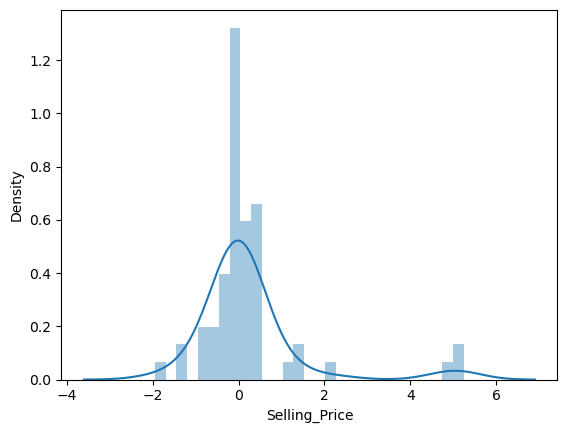

In [113]:
sns.distplot(y_test - prediction)

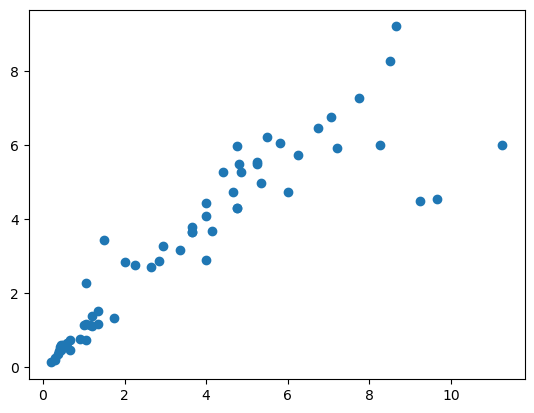

In [114]:
plt.scatter(y_test,prediction)

### Deployment


In [115]:
X.head()

,Present_Price,Driven_kms,Owner,Year_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,10,False,True,False,True
1,9.54,43000,0,11,True,False,False,True
2,9.85,6900,0,7,False,True,False,True
3,4.15,5200,0,13,False,True,False,True
4,6.87,42450,0,10,True,False,False,True


In [116]:
single = np.array([7.36,23000.0,0.0, 6.0, 0.0, 1.0, 0.0, 1.0])
single = single.reshape(1, -1)

In [117]:
rf_random.predict(single)

array([5.7555])

For the given values in the array the selling price of the car is predicted to be as 5.5485.